# Development of Sony Sales Through 1994-2016

## Section 1: Business Understanding

Video games industry has started in 1980. Since the 2010s, the commercial importance of the video game industry has been increasing. The emerging Asian markets and mobile games on smartphones in particular are driving the growth of the industry. Sony is one of the key players in this industry, accordingly, this project aims to look at Sony sales development. 
This project aims to answer the following quistions:

Q1: What is sales trend between 1994 and 2016?
Q2: Does sales differ between genre?
Q3: How Sony sales changed with different platforms

In [1]:
import pandas as pd
import csv
import matplotlib
import matplotlib.pyplot as plt
import numpy
import numpy as np
import matplotlib.pyplot as plt

## Section 2: Data Understanding

In [2]:
df = pd.read_csv('vgsales.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


The data lists the sales of video games published by various companies. The focus of this study is Sony sales developemen, accordingly, Sony sales record only considered 

## Section 3: Data Prepration

In [3]:
#filter publsiher records and search for publisher in which 'Sony' is included 
sony=df.loc[df.Publisher.str.contains('Sony', na=False)] 
#sony.info()

In [4]:
# aggragte data per year
sony_year=sony.groupby(['Year']).sum()
#sony_year.info()
#display(sony_year)

## Evaluation and Results

### Question 1: What is  sales trend between 1994 and 2016?

To look at the sales for each region, trend charts are presnted below   

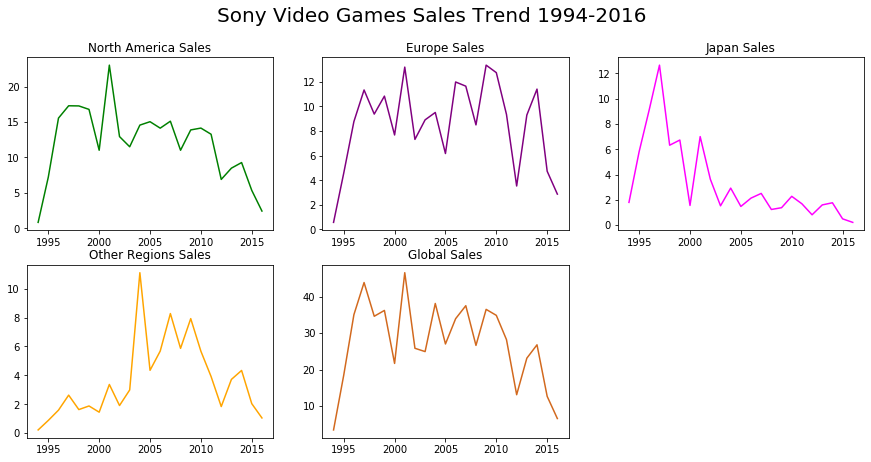

In [5]:
# develop trend charts for different regions
fig = plt.figure(figsize=(15,7))

fig.suptitle('Sony Video Games Sales Trend 1994-2016', 
             fontsize=20)

ax1 = fig.add_subplot(231)
ax1.set_title('North America Sales')

ax1.plot(sony_year['NA_Sales'], 
         color='green')

ax2 = fig.add_subplot(232)
ax2.set_title('Europe Sales')

ax2.plot(sony_year['EU_Sales'], 
         color='purple')

ax3 = fig.add_subplot(233)
ax3.set_title('Japan Sales')

ax3.plot(sony_year['JP_Sales'],
         color='magenta')

ax4 = fig.add_subplot(234)
ax4.set_title('Other Regions Sales')

ax4.plot(sony_year['Other_Sales'],
         color='orange')

ax4 = fig.add_subplot(235)
ax4.set_title('Global Sales')

ax4.plot(sony_year['Global_Sales'],
         color='chocolate')

plt.show()

As displayed in the graphes, sales tend to be seasonal every three years. For instance, it is clear that Japan sales has negative trend; decreased drastically since 2002. Same trend for north America. On the other side, Europe sales tend to have static trend. on the opposite side, the sales trend in other regions tend to have positive trend.

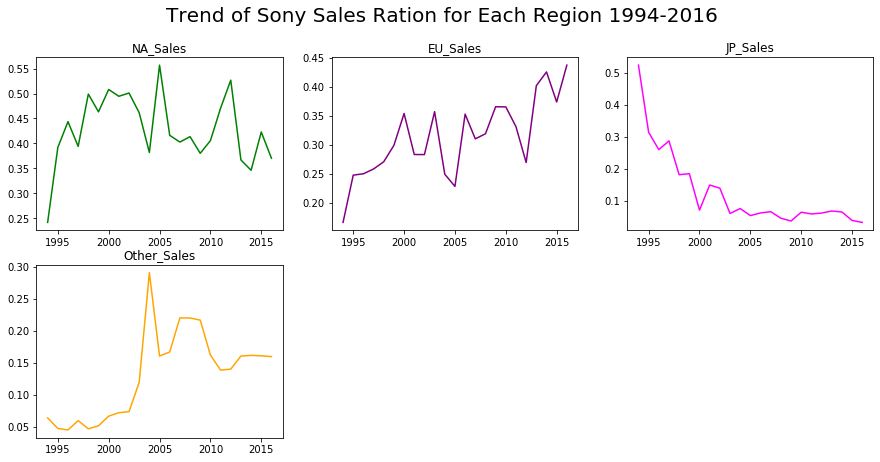

In [6]:
 fig = plt.figure(figsize=(15,7))

fig.suptitle('Trend of Sony Sales Ration for Each Region 1994-2016', 
             fontsize=20)

ax1 = fig.add_subplot(231)
ax1.set_title('NA_Sales')

ax1.plot(sony_year['NA_Sales']/sony_year['Global_Sales'], 
         color='green')

ax2 = fig.add_subplot(232)
ax2.set_title('EU_Sales')

ax2.plot(sony_year['EU_Sales']/sony_year['Global_Sales'], 
         color='purple')

ax3 = fig.add_subplot(233)
ax3.set_title('JP_Sales')

ax3.plot(sony_year['JP_Sales']/sony_year['Global_Sales'],
         color='magenta')

ax4 = fig.add_subplot(234)
ax4.set_title('Other_Sales')

ax4.plot(sony_year['Other_Sales']/sony_year['Global_Sales'],
         color='orange')

plt.show()

Charts shows that ratio of eruope and other countries sales have postive trends. Japan market has the oppoiste trend, the ratio of Japans sales tend to decrease over time while the trend ot North America sales ratio tends to range betwneen 0.35 to 0.54.

### Question 2: Does sales differ between genre?

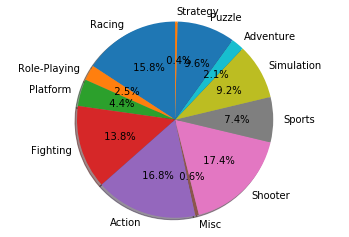

In [7]:
#to find out genre contributions, sony sales aggregated per genre through the years
sony_genre=sony.groupby(['Genre']).sum()
#display(sony_genre)

labels = sony['Genre'].unique()
sizes = sony_genre['Global_Sales']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%5.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


Looking at genre sales over years showed that shooter, action and racing developed largest sales. However, looking at the ration sales for each genre, as displayed in the following chart, showed that the ration sales of Action, Adventure and shooter have positive trend while fighting, platform, puzzle, racing, role-playing, simulation, strategy have negative trends. Also, apparently, Sony does not develop any puzzle, role-playing, strategy and simulation games in the last few years.

In [8]:
#aggregate sony sales data annually per genre
sony_year_genre=sony.groupby(['Year','Genre']).sum()
sony_year_genre.info()
#display(sony_year_genre)
sony_year_genre=sony_year_genre.drop(['NA_Sales','Rank','EU_Sales','JP_Sales','Other_Sales'], axis=1)
#display(sony_year_genre)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 198 entries, (1994.0, Fighting) to (2016.0, Shooter)
Data columns (total 6 columns):
Rank            198 non-null int64
NA_Sales        198 non-null float64
EU_Sales        198 non-null float64
JP_Sales        198 non-null float64
Other_Sales     198 non-null float64
Global_Sales    198 non-null float64
dtypes: float64(5), int64(1)
memory usage: 10.0+ KB


Over years, Shooter, Action and Racing have the highest sales 

In [25]:
#convert genre from rows to columns
pivoted =  sony_year_genre.pivot_table('Global_Sales', ['Year'], 'Genre')
pivoted.columns.name=None
pivoted['Global_Sales']=sony_year['Global_Sales']
#pivoted.shape
#pivoted.info()
#pivoted.describe()

Checking null value ndicates that there are some missing values. I will assume that there was no games for that genre that's why there is no value. Acccordingly, null value will be replaced by zero. Also, info tables shows that there is no column has only one value

In [26]:
#fill null vale with zeros
pivoted=pivoted.fillna(0)
#display(pivoted)

In [6]:
#function to claculate ration sony genre sales compared tp sony globl sale
def calc_ratio(test):
    """
    This is to return calculated ratio.
    """
    df1=test
    columns = list(test)
    for j in columns : 
        for i in range(test.shape[0]): 
            if j == 'Global_Sales':
                break 
            df1.iloc[i][j]=test.iloc[i][j]/test.iloc[i][12]
    #display (df1)
    return df1

In [12]:
sony_genre_ratio=calc_ratio(pivoted)

In [13]:
#Calculate sales ratio of each genre to annual sales of each year
sony_genre_ratio=sony_genre_ratio.drop(['Global_Sales'], axis=1)
sony_genre_ratio.head()

,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1994.0,0.000000,0.000000,0.370262,0.000000,0.000000,0.000000,0.250729,0.029155,0.107872,0.000000,0.241983,0.000000
1995.0,0.092141,0.001084,0.248238,0.214092,0.017886,0.000000,0.057995,0.107859,0.029810,0.128455,0.082927,0.019512
1996.0,0.000000,0.000000,0.247790,0.208725,0.201597,0.000000,0.162247,0.071286,0.000000,0.002566,0.105788,0.000000
1997.0,0.021868,0.004784,0.026424,0.003189,0.182688,0.027790,0.314579,0.224601,0.013895,0.031891,0.134852,0.013440
1998.0,0.043303,0.020208,0.221132,0.076212,0.454677,0.021363,0.005774,0.050808,0.000000,0.030312,0.076212,0.000000


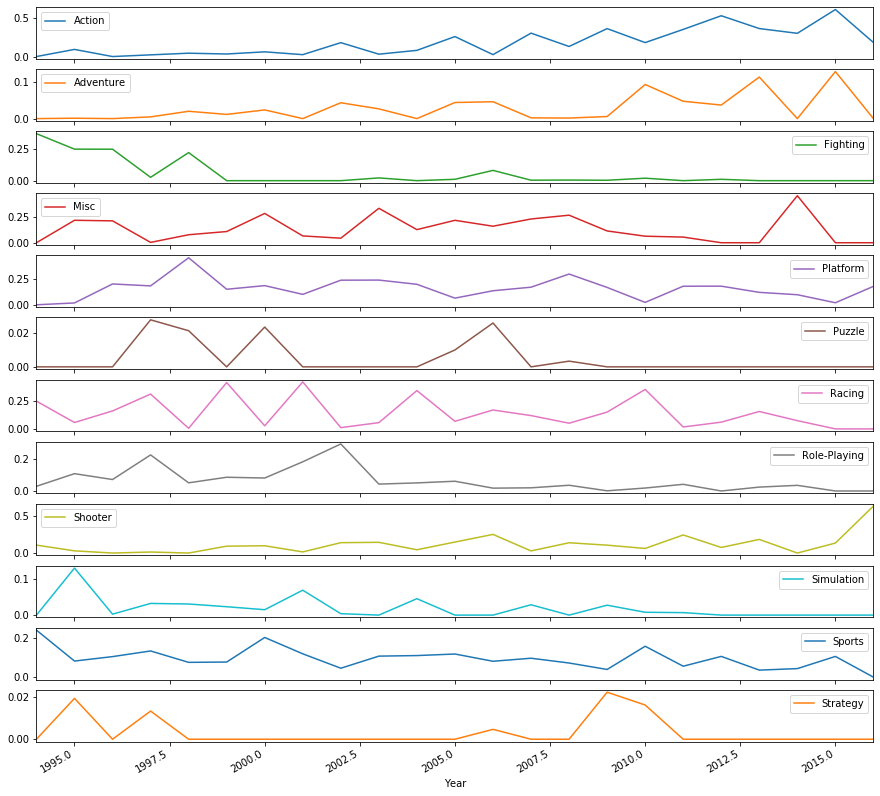

In [15]:
sony_genre_ratio.plot(subplots=True, figsize=(15, 15)); plt.legend(loc='best')

it charts show that Action and Adventure have postive trend over years

In [19]:
#sales of other companies
notSony=df.merge(sony, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='left_only']
#notSony.info()
#aggregate sales of other companies annually per genre
other_year_genre=notSony.groupby(['Year','Genre']).sum()
#aggregate sales of other companie annulaly
notSony_year=notSony.groupby(['Year']).sum()
#display(other_year_genre)
#display(notSony_year)

In [20]:
pivotedOther =  other_year_genre.pivot_table('Global_Sales', ['Year'], 'Genre')
pivotedOther.columns.name=None
pivotedOther['Global_Sales']=notSony_year['Global_Sales']
#fill null vale with zeros
pivotedOther=pivotedOther.fillna(0)
pivotedOther=pivotedOther.drop(list(range(1980,1994)))
#pivotedOther.head()
#pivotedOther.shape
#pivotedOther.info()
#pivotedOther.describe()
#display(pivotedOther)
#display(pivoted)

In [7]:
#function to claculate ration sony genre sales compared to other publishers
def competition(pub1,pub2):
    """
    This is to return calculated ratio.
    """
    comparison=pub1
    columns = list(pub1)
    for i , j in zip ( range(pub1.shape[0]), columns): 
            comparison.iloc[i][j]=pub1.iloc[i][j]/pub2.iloc[i][j]
    return comparison
    print('nosaia')

In [29]:
#sony annual genre sales vs competitors 
genre_ratio=competition (pivoted,pivotedOther)
#type(genre_ratio)
#drop sales of 2017 and 2020 since sony sales data not available
genre_ratio=pivotedOther.drop([2017,2020])
genre_ratio=genre_ratio.fillna(0)   #to replacce NA because of  zero div
genre_ratio.iloc[1][0]=pivoted.iloc[1][0]/pivotedOther.iloc[1][0]
display(genre_ratio)


,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Global_Sales
Year,,,,,,,,,,,,,
1994.0,1.550000,3.74,7.20,2.86,28.74,1.53,1.33,7.01,7.93,2.73,7.56,3.56,75.74
1995.0,0.909091,0.70,10.27,2.45,16.36,2.71,5.02,12.27,3.60,1.81,6.45,6.15,69.66
1996.0,20.580000,4.19,9.37,3.36,21.16,3.91,22.55,41.46,6.91,11.24,13.74,5.61,164.08
1997.0,26.620000,4.75,10.60,5.55,13.83,4.67,18.10,11.93,21.56,8.25,24.10,7.12,157.08
1998.0,37.940000,8.35,24.00,9.30,14.13,5.60,27.70,26.33,9.80,6.06,39.15,13.47,221.83
1999.0,26.590000,7.18,14.26,16.78,15.38,1.36,22.10,45.99,8.85,10.61,27.47,18.46,215.03
2000.0,32.720000,2.46,20.22,9.48,12.04,3.31,19.38,27.28,4.66,3.06,36.76,8.50,179.87
2001.0,58.250000,9.12,18.12,13.37,34.58,8.00,36.03,13.59,24.06,16.37,45.83,7.55,284.87
2002.0,82.130000,9.92,25.02,14.55,39.82,5.34,29.90,37.56,44.93,10.71,64.23,5.56,369.67


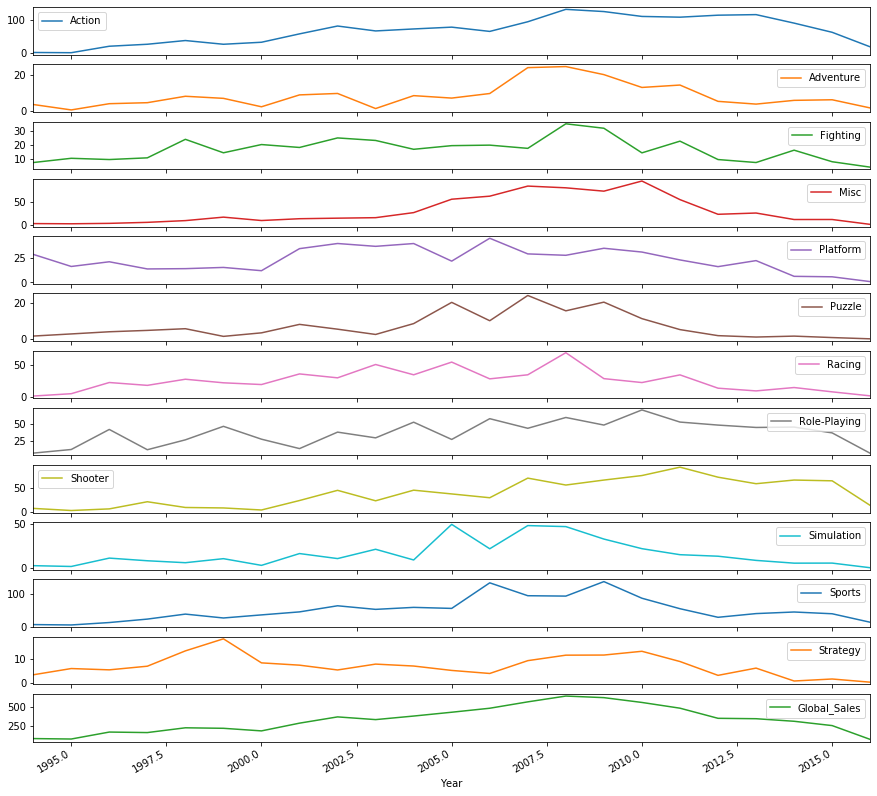

In [30]:
#display sony sales performance compared to thier compettor
genre_ratio.plot(subplots=True, figsize=(15, 15)); plt.legend(loc='best')

In general, sony sales has started to take off in 1997 and hit peak between 2005 and 2010. Focusing on Action and Adventure genres shows that Sony's outperformed outperform their competitors between 2001 and 2015 with sales and dominate the market between 2008–2012 with sales ration exceeds 100% competitors sales

### Question 3: How Sony sales changed with different platforms

In [31]:
sony_platform=sony.groupby(['Platform']).sum()
#display(sony_platform)

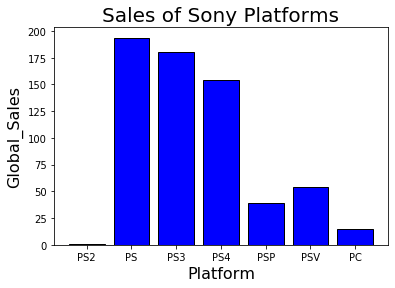

In [32]:
labels = sony['Platform'].unique()
sizes = sony_platform['Global_Sales']


pos = np.arange(len(labels))

plt.bar(pos,sizes,color='blue',edgecolor='black')
plt.xticks(pos, labels)
plt.xlabel('Platform', fontsize=16)
plt.ylabel('Global_Sales', fontsize=16)
plt.title('Sales of Sony Platforms',fontsize=20)
plt.show()

The chart shows that the the platform of portable games has lower sales compered to PS2, PS3, and PS4. Also it shows that the sales of newer version of PlayStation game console (PS, PS3,and  PS4) are decreasing.